In [30]:
import numpy as np
import sys
import torch
from torchvision import datasets, transforms
import os
import numpy as np
from os.path import join, exists
import pandas as pd
import numpy as np
from multiae import VAE
import matplotlib.pyplot as plt
%matplotlib inline 

### Load the MNIST data

In [104]:
MNIST_1 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_1 = MNIST_1.train_data.reshape(-1, 784).float() / 255.
target = MNIST_1.train_labels
data_2 = MNIST_2.train_data.float() / 255.
data_2 = torch.rot90(data_2, 1, [1, 2])
data_2 = data_2.reshape(-1,784)

### Define input parameters

In [105]:
#define training parameters
trainer_dict = {
                'checkpoint_metric_name': 'val_loss',
                'checkpoint_monitor_mode': 'min',
                'early_stopping': True,
                'early_stopping_delta': 0.0001,
                'early_stopping_patience': 30, 
                }
n_epochs = 150
batch_size = 2000
path = '../MNISTresults'

#define model parameters
dist = 'bernoulli'
n_latents = 10
hidden_layers = [100]
beta = 1
threshold = 0
learning_rate = 0.001
non_linear = False
save_model = True

In [106]:
models = VAE(input_dims=[784, 784], 
             dist=dist, 
             trainer_dict=trainer_dict,
             z_dim=n_latents,
             hidden_layer_dims=hidden_layers,
             n_epochs=n_epochs,
             learning_rate=learning_rate,
             beta=beta,
             threshold=threshold,
             save_model=save_model,
             )

[100]


In [107]:
print(models)

VAE(
  (encoders): ModuleList(
    (0): Encoder(
      (encoder_layers): Sequential(
        (0): Linear(in_features=784, out_features=100, bias=True)
      )
      (enc_mean_layer): Linear(in_features=100, out_features=10, bias=True)
      (enc_logvar_layer): Linear(in_features=100, out_features=10, bias=True)
    )
    (1): Encoder(
      (encoder_layers): Sequential(
        (0): Linear(in_features=784, out_features=100, bias=True)
      )
      (enc_mean_layer): Linear(in_features=100, out_features=10, bias=True)
      (enc_logvar_layer): Linear(in_features=100, out_features=10, bias=True)
    )
  )
  (decoders): ModuleList(
    (0): Decoder(
      (decoder_layers): Sequential(
        (0): Linear(in_features=10, out_features=100, bias=True)
      )
      (decoder_mean_layer): Linear(in_features=100, out_features=784, bias=True)
    )
    (1): Decoder(
      (decoder_layers): Sequential(
        (0): Linear(in_features=10, out_features=100, bias=True)
      )
      (decoder_mean_la

### Train the model

In [108]:
models.fit(data_1, 
        data_2, 
        n_epochs=n_epochs, 
        output_path=path, 
        val_set=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | encoders | ModuleList | 161 K 
1 | decoders | ModuleList | 160 K 
----------------------------------------
321 K     Trainable params
0         Non-trainable params
321 K     Total params
1.286     Total estimated model params size (MB)
C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:623: UserWarning: Checkpoint directory C:\Users\anala\Documents\PhD\MNISTresults exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:413: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Metric val_loss improved. New best score: 2189.682


Metric val_loss improved by 25.130 >= min_delta = 0.0001. New best score: 2164.552


Metric val_loss improved by 25.321 >= min_delta = 0.0001. New best score: 2139.231


Metric val_loss improved by 26.787 >= min_delta = 0.0001. New best score: 2112.445


Metric val_loss improved by 29.074 >= min_delta = 0.0001. New best score: 2083.371


Metric val_loss improved by 34.467 >= min_delta = 0.0001. New best score: 2048.904


Metric val_loss improved by 40.587 >= min_delta = 0.0001. New best score: 2008.318


Metric val_loss improved by 50.510 >= min_delta = 0.0001. New best score: 1957.808


Metric val_loss improved by 58.571 >= min_delta = 0.0001. New best score: 1899.237


Metric val_loss improved by 67.865 >= min_delta = 0.0001. New best score: 1831.372


Metric val_loss improved by 76.520 >= min_delta = 0.0001. New best score: 1754.852


Metric val_loss improved by 82.964 >= min_delta = 0.0001. New best score: 1671.889


Metric val_loss improved by 83.713 >= min_delta = 0.0001. New best score: 1588.176


Metric val_loss improved by 82.676 >= min_delta = 0.0001. New best score: 1505.500


Metric val_loss improved by 77.441 >= min_delta = 0.0001. New best score: 1428.059


Metric val_loss improved by 67.358 >= min_delta = 0.0001. New best score: 1360.701


Metric val_loss improved by 57.226 >= min_delta = 0.0001. New best score: 1303.475


Metric val_loss improved by 49.287 >= min_delta = 0.0001. New best score: 1254.188


Metric val_loss improved by 38.784 >= min_delta = 0.0001. New best score: 1215.404


Metric val_loss improved by 33.801 >= min_delta = 0.0001. New best score: 1181.603


Metric val_loss improved by 31.283 >= min_delta = 0.0001. New best score: 1150.320


Metric val_loss improved by 28.579 >= min_delta = 0.0001. New best score: 1121.741


Metric val_loss improved by 26.341 >= min_delta = 0.0001. New best score: 1095.400


Metric val_loss improved by 24.423 >= min_delta = 0.0001. New best score: 1070.977


Metric val_loss improved by 21.842 >= min_delta = 0.0001. New best score: 1049.135


Metric val_loss improved by 16.914 >= min_delta = 0.0001. New best score: 1032.221


Metric val_loss improved by 14.613 >= min_delta = 0.0001. New best score: 1017.608


Metric val_loss improved by 12.560 >= min_delta = 0.0001. New best score: 1005.048


Metric val_loss improved by 9.091 >= min_delta = 0.0001. New best score: 995.957


Metric val_loss improved by 8.213 >= min_delta = 0.0001. New best score: 987.744


Metric val_loss improved by 8.078 >= min_delta = 0.0001. New best score: 979.666


Metric val_loss improved by 10.341 >= min_delta = 0.0001. New best score: 969.324


Metric val_loss improved by 4.894 >= min_delta = 0.0001. New best score: 964.430


Metric val_loss improved by 9.288 >= min_delta = 0.0001. New best score: 955.142


Metric val_loss improved by 6.129 >= min_delta = 0.0001. New best score: 949.013


Metric val_loss improved by 8.494 >= min_delta = 0.0001. New best score: 940.519


Metric val_loss improved by 5.991 >= min_delta = 0.0001. New best score: 934.528


Metric val_loss improved by 5.099 >= min_delta = 0.0001. New best score: 929.429


Metric val_loss improved by 5.908 >= min_delta = 0.0001. New best score: 923.521


Metric val_loss improved by 3.573 >= min_delta = 0.0001. New best score: 919.949


Metric val_loss improved by 4.580 >= min_delta = 0.0001. New best score: 915.368


Metric val_loss improved by 4.986 >= min_delta = 0.0001. New best score: 910.383


Metric val_loss improved by 3.576 >= min_delta = 0.0001. New best score: 906.807


Metric val_loss improved by 4.578 >= min_delta = 0.0001. New best score: 902.229


Metric val_loss improved by 3.703 >= min_delta = 0.0001. New best score: 898.526


Metric val_loss improved by 2.376 >= min_delta = 0.0001. New best score: 896.150


Metric val_loss improved by 5.265 >= min_delta = 0.0001. New best score: 890.885


Metric val_loss improved by 3.375 >= min_delta = 0.0001. New best score: 887.510


Metric val_loss improved by 5.285 >= min_delta = 0.0001. New best score: 882.225


Metric val_loss improved by 2.114 >= min_delta = 0.0001. New best score: 880.111


Metric val_loss improved by 5.769 >= min_delta = 0.0001. New best score: 874.342


Metric val_loss improved by 2.002 >= min_delta = 0.0001. New best score: 872.340


Metric val_loss improved by 5.430 >= min_delta = 0.0001. New best score: 866.910


Metric val_loss improved by 3.808 >= min_delta = 0.0001. New best score: 863.102


Metric val_loss improved by 2.924 >= min_delta = 0.0001. New best score: 860.178


Metric val_loss improved by 2.675 >= min_delta = 0.0001. New best score: 857.503


Metric val_loss improved by 5.097 >= min_delta = 0.0001. New best score: 852.406


Metric val_loss improved by 4.069 >= min_delta = 0.0001. New best score: 848.337


Metric val_loss improved by 4.400 >= min_delta = 0.0001. New best score: 843.937


Metric val_loss improved by 1.581 >= min_delta = 0.0001. New best score: 842.356


Metric val_loss improved by 3.851 >= min_delta = 0.0001. New best score: 838.505


Metric val_loss improved by 3.082 >= min_delta = 0.0001. New best score: 835.422


Metric val_loss improved by 4.224 >= min_delta = 0.0001. New best score: 831.198


Metric val_loss improved by 3.276 >= min_delta = 0.0001. New best score: 827.922


Metric val_loss improved by 4.752 >= min_delta = 0.0001. New best score: 823.170


Metric val_loss improved by 0.510 >= min_delta = 0.0001. New best score: 822.660


Metric val_loss improved by 6.332 >= min_delta = 0.0001. New best score: 816.328


Metric val_loss improved by 2.267 >= min_delta = 0.0001. New best score: 814.061


Metric val_loss improved by 2.970 >= min_delta = 0.0001. New best score: 811.091


Metric val_loss improved by 4.772 >= min_delta = 0.0001. New best score: 806.319


Metric val_loss improved by 2.488 >= min_delta = 0.0001. New best score: 803.831


Metric val_loss improved by 2.603 >= min_delta = 0.0001. New best score: 801.228


Metric val_loss improved by 3.082 >= min_delta = 0.0001. New best score: 798.146


Metric val_loss improved by 4.851 >= min_delta = 0.0001. New best score: 793.295


Metric val_loss improved by 3.117 >= min_delta = 0.0001. New best score: 790.177


Metric val_loss improved by 0.597 >= min_delta = 0.0001. New best score: 789.581


Metric val_loss improved by 5.664 >= min_delta = 0.0001. New best score: 783.917


Metric val_loss improved by 0.654 >= min_delta = 0.0001. New best score: 783.263


Metric val_loss improved by 4.342 >= min_delta = 0.0001. New best score: 778.921


Metric val_loss improved by 0.755 >= min_delta = 0.0001. New best score: 778.166


Metric val_loss improved by 3.246 >= min_delta = 0.0001. New best score: 774.921


Metric val_loss improved by 2.801 >= min_delta = 0.0001. New best score: 772.119


Metric val_loss improved by 2.646 >= min_delta = 0.0001. New best score: 769.474


Metric val_loss improved by 1.755 >= min_delta = 0.0001. New best score: 767.719


Metric val_loss improved by 2.656 >= min_delta = 0.0001. New best score: 765.063


Metric val_loss improved by 1.506 >= min_delta = 0.0001. New best score: 763.557


Metric val_loss improved by 3.373 >= min_delta = 0.0001. New best score: 760.184


Metric val_loss improved by 0.642 >= min_delta = 0.0001. New best score: 759.542


Metric val_loss improved by 3.785 >= min_delta = 0.0001. New best score: 755.757


Metric val_loss improved by 1.630 >= min_delta = 0.0001. New best score: 754.127


Metric val_loss improved by 2.724 >= min_delta = 0.0001. New best score: 751.403


Metric val_loss improved by 1.757 >= min_delta = 0.0001. New best score: 749.646


Metric val_loss improved by 3.161 >= min_delta = 0.0001. New best score: 746.485


Metric val_loss improved by 2.207 >= min_delta = 0.0001. New best score: 744.277


Metric val_loss improved by 1.875 >= min_delta = 0.0001. New best score: 742.403


Metric val_loss improved by 1.771 >= min_delta = 0.0001. New best score: 740.631


Metric val_loss improved by 2.237 >= min_delta = 0.0001. New best score: 738.395


Metric val_loss improved by 2.083 >= min_delta = 0.0001. New best score: 736.312


Metric val_loss improved by 2.458 >= min_delta = 0.0001. New best score: 733.854


Metric val_loss improved by 2.764 >= min_delta = 0.0001. New best score: 731.090


Metric val_loss improved by 1.462 >= min_delta = 0.0001. New best score: 729.628


Metric val_loss improved by 3.379 >= min_delta = 0.0001. New best score: 726.249


Metric val_loss improved by 1.235 >= min_delta = 0.0001. New best score: 725.013


Metric val_loss improved by 2.330 >= min_delta = 0.0001. New best score: 722.683


Metric val_loss improved by 2.810 >= min_delta = 0.0001. New best score: 719.873


Metric val_loss improved by 2.690 >= min_delta = 0.0001. New best score: 717.183


Metric val_loss improved by 1.531 >= min_delta = 0.0001. New best score: 715.652


Metric val_loss improved by 1.609 >= min_delta = 0.0001. New best score: 714.044


Metric val_loss improved by 2.556 >= min_delta = 0.0001. New best score: 711.487


Metric val_loss improved by 1.689 >= min_delta = 0.0001. New best score: 709.798


Metric val_loss improved by 2.372 >= min_delta = 0.0001. New best score: 707.426


Metric val_loss improved by 1.828 >= min_delta = 0.0001. New best score: 705.597


Metric val_loss improved by 1.629 >= min_delta = 0.0001. New best score: 703.969


Metric val_loss improved by 0.687 >= min_delta = 0.0001. New best score: 703.282


Metric val_loss improved by 3.015 >= min_delta = 0.0001. New best score: 700.267


Metric val_loss improved by 3.144 >= min_delta = 0.0001. New best score: 697.123


Metric val_loss improved by 0.982 >= min_delta = 0.0001. New best score: 696.141


Metric val_loss improved by 1.764 >= min_delta = 0.0001. New best score: 694.378


Metric val_loss improved by 1.389 >= min_delta = 0.0001. New best score: 692.988


Metric val_loss improved by 2.534 >= min_delta = 0.0001. New best score: 690.454


Metric val_loss improved by 1.523 >= min_delta = 0.0001. New best score: 688.930


Metric val_loss improved by 0.622 >= min_delta = 0.0001. New best score: 688.308


Metric val_loss improved by 1.632 >= min_delta = 0.0001. New best score: 686.676


Metric val_loss improved by 2.442 >= min_delta = 0.0001. New best score: 684.234


Metric val_loss improved by 0.400 >= min_delta = 0.0001. New best score: 683.834


Metric val_loss improved by 2.254 >= min_delta = 0.0001. New best score: 681.581


Metric val_loss improved by 3.024 >= min_delta = 0.0001. New best score: 678.557


Metric val_loss improved by 0.980 >= min_delta = 0.0001. New best score: 677.577


Metric val_loss improved by 0.489 >= min_delta = 0.0001. New best score: 677.088


Metric val_loss improved by 1.152 >= min_delta = 0.0001. New best score: 675.935


Metric val_loss improved by 1.577 >= min_delta = 0.0001. New best score: 674.359


Metric val_loss improved by 1.548 >= min_delta = 0.0001. New best score: 672.811


Metric val_loss improved by 1.640 >= min_delta = 0.0001. New best score: 671.172


Metric val_loss improved by 1.199 >= min_delta = 0.0001. New best score: 669.972


Metric val_loss improved by 1.928 >= min_delta = 0.0001. New best score: 668.044


Metric val_loss improved by 0.616 >= min_delta = 0.0001. New best score: 667.428


Metric val_loss improved by 2.015 >= min_delta = 0.0001. New best score: 665.413


Metric val_loss improved by 1.149 >= min_delta = 0.0001. New best score: 664.264


Metric val_loss improved by 1.485 >= min_delta = 0.0001. New best score: 662.779


Metric val_loss improved by 1.270 >= min_delta = 0.0001. New best score: 661.509


Metric val_loss improved by 2.057 >= min_delta = 0.0001. New best score: 659.451


Metric val_loss improved by 1.545 >= min_delta = 0.0001. New best score: 657.906


Metric val_loss improved by 0.805 >= min_delta = 0.0001. New best score: 657.101


Metric val_loss improved by 2.033 >= min_delta = 0.0001. New best score: 655.068


Metric val_loss improved by 0.788 >= min_delta = 0.0001. New best score: 654.280


Metric val_loss improved by 1.522 >= min_delta = 0.0001. New best score: 652.758


Metric val_loss improved by 3.097 >= min_delta = 0.0001. New best score: 649.661


Metric val_loss improved by 1.194 >= min_delta = 0.0001. New best score: 648.467


Metric val_loss improved by 1.287 >= min_delta = 0.0001. New best score: 647.180


In [48]:
!tensorboard --logdir=../MNISTresults/logs

^C


In [109]:
latents = models.predict_latents(data_1, data_2)

### Create UMAP plots - how well does the latent space separate MNIST labels?

In [110]:
models.plot_UMAP(data=latents, target=target, title=['Original MNIST latent space', 'Rotated MNIST latent space'], title_short='MNIST')

C:\Users\anala\Documents\PhD\library_dev\multiae\plot\plotting.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(join(self.output_path, 'UMAP_{0}.png'.format(title_short[i])))
C:\Users\anala\Documents\PhD\library_dev\multiae\plot\plotting.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(join(self.output_path, 'UMAP_{0}.png'.format(title_short[i])))


In [111]:
pred = models.predict_reconstruction(data_1, data_2)

### Reconstruction plots - how well can the VAE do same view reconstruction?

In [118]:
data_sample = data_1[20]
#indices: view 1 latent, view 1 decoder, sample 21
pred_sample = pred[0][0][20]

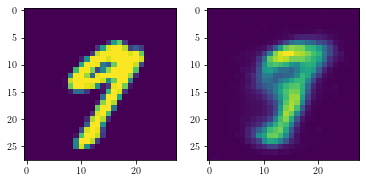

In [119]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))

### Reconstruction plots - how well can the VAE do cross view reconstruction?

In [120]:
data_sample = data_1[20]
#indices: view 1 latent, view 2 decoder, sample 21
pred_sample = pred[1][0][20]

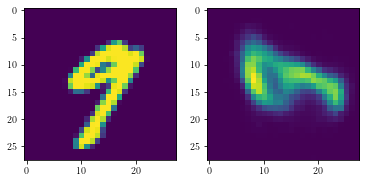

In [121]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))